In [1]:
# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA) - SUPERSTORE SALES
# Mục tiêu:
# 1. Hiểu cấu trúc dữ liệu (Data Understanding).
# 2. Làm sạch và xử lý dữ liệu (Data Cleaning).
# 3. Phân tích đơn biến và đa biến để tìm Insight.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:

try:
    df = pd.read_csv('../data/raw/Sample - Superstore.csv', encoding='windows-1252')
    print(f"Data loaded! Shape: {df.shape}")
except Exception as e:
    print(f"Error: {e}")

df.head()

Data loaded! Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

display(df.describe())

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())
print(f"\nSố dòng trùng lặp: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



--- MISSING VALUES ---
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Số dòng trùng lặp: 0


In [4]:
df.drop_duplicates(inplace=True)

df.columns = [col.strip().lower().replace('-', '_').replace(' ', '_') for col in df.columns]

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['profit_margin'] = df['profit'] / df['sales']

print("Data cleaned and ready for analysis.")
df.head(3)

Data cleaned and ready for analysis.


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,month,profit_margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,0.16
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,0.30
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,6,0.47


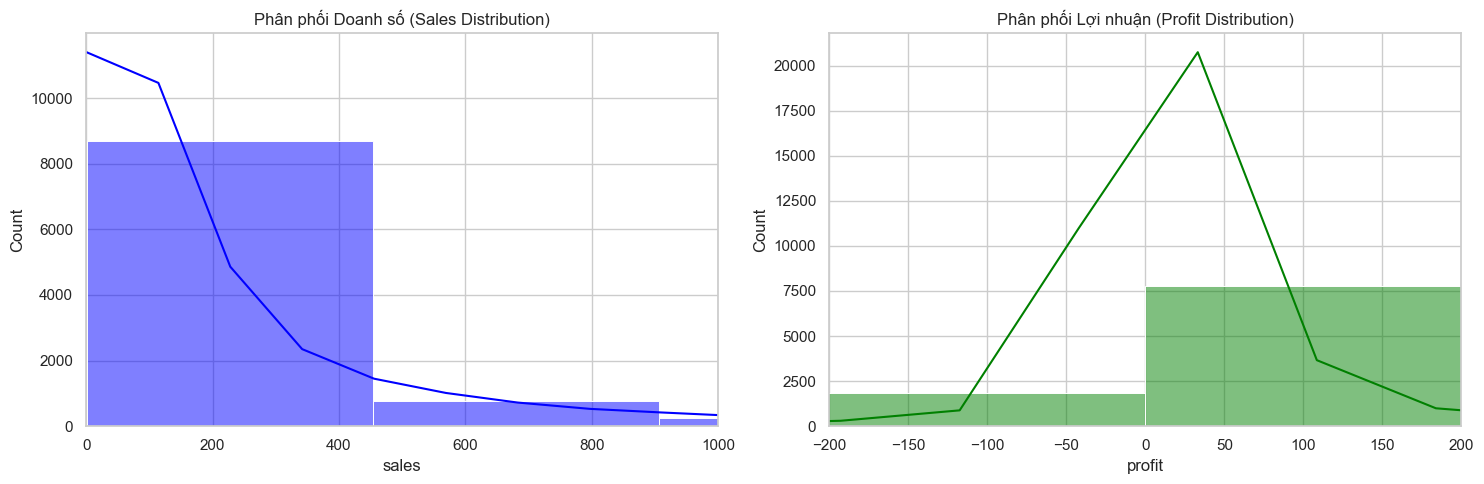

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['sales'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Phân phối Doanh số (Sales Distribution)')
axes[0].set_xlim(0, 1000)

sns.histplot(df['profit'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('Phân phối Lợi nhuận (Profit Distribution)')
axes[1].set_xlim(-200, 200)

plt.tight_layout()
plt.show()

# Nhận xét:
# - Doanh số tập trung chủ yếu ở các đơn hàng giá trị nhỏ (< 200$).
# - Lợi nhuận tập trung quanh mức 0, nhưng có đuôi dài về cả 2 phía (lãi đậm và lỗ đậm).

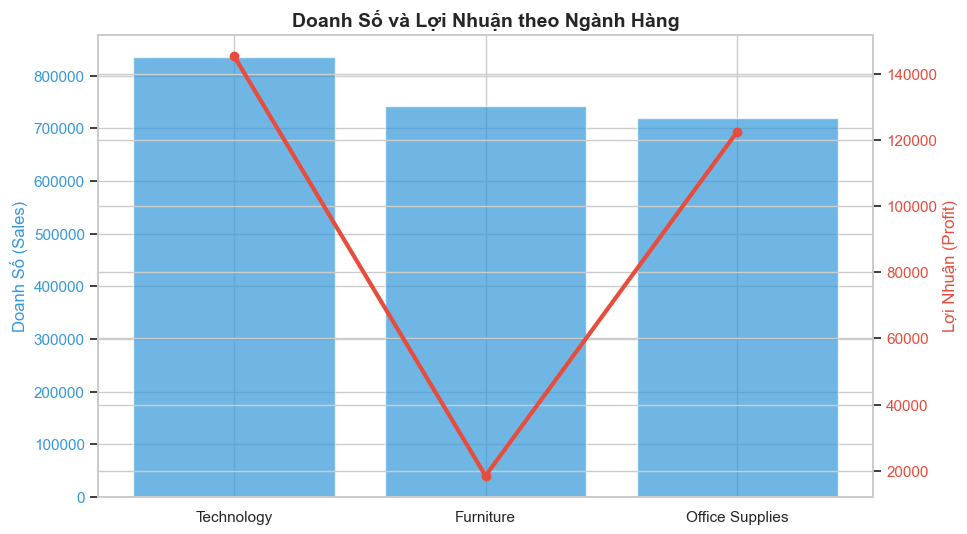

In [7]:
cat_analysis = df.groupby('category')[['sales', 'profit']].sum().sort_values('sales', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(cat_analysis.index, cat_analysis['sales'], color='#3498db', label='Sales', alpha=0.7)
ax1.set_ylabel('Doanh Số (Sales)', color='#3498db', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#3498db')

ax2 = ax1.twinx()
ax2.plot(cat_analysis.index, cat_analysis['profit'], color='#e74c3c', marker='o', linewidth=3, label='Profit')
ax2.set_ylabel('Lợi Nhuận (Profit)', color='#e74c3c', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title('Doanh Số và Lợi Nhuận theo Ngành Hàng', fontsize=14, fontweight='bold')
plt.show()

# Insight:
# - Technology có doanh số và lợi nhuận đều cao nhất.
# - Furniture doanh số cao nhưng lợi nhuận rất thấp (cần điều tra thêm).

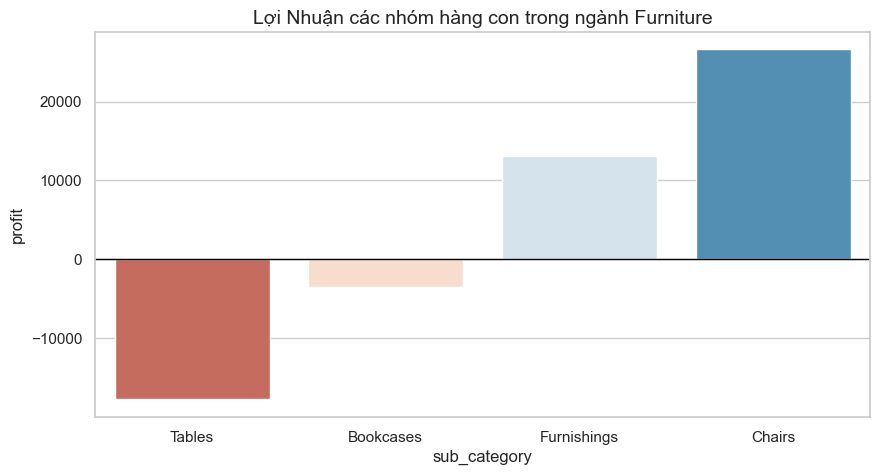

In [8]:
furniture_df = df[df['category'] == 'Furniture']

furn_sub = furniture_df.groupby('sub_category')[['sales', 'profit']].sum().sort_values('profit')

plt.figure(figsize=(10, 5))
sns.barplot(x=furn_sub.index, y=furn_sub['profit'], palette='RdBu')
plt.title('Lợi Nhuận các nhóm hàng con trong ngành Furniture', fontsize=14)
plt.axhline(0, color='black', linewidth=1) # Đường kẻ ngang mức 0
plt.show()

# Insight(Critical Finding):
# - "Tables" (Bàn) và "Bookcases" (Tủ sách) đang gây lỗ cho cửa hàng.
# - Cần xem xét lại chính sách giá hoặc chi phí vận chuyển của 2 mặt hàng này.

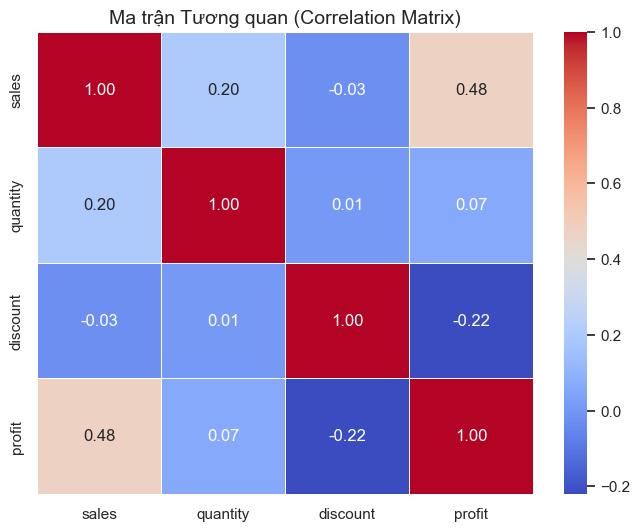

In [9]:
corr_matrix = df[['sales', 'quantity', 'discount', 'profit']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận Tương quan (Correlation Matrix)', fontsize=14)
plt.show()

# Insight:
# - Discount và Profit có tương quan âm (-0.22). Nghĩa là Discount càng cao, Profit càng giảm.
# - Sales và Profit có tương quan dương (0.48).

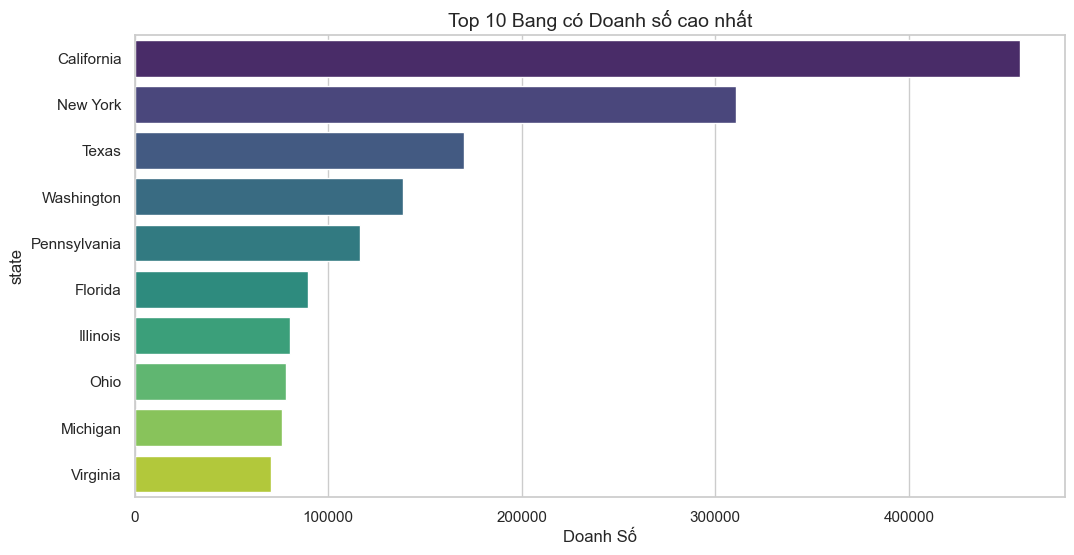

In [10]:
top_states = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, legend=False, palette='viridis')
plt.title('Top 10 Bang có Doanh số cao nhất', fontsize=14)
plt.xlabel('Doanh Số')
plt.show()